In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Метод опорных векторов. Support Vector Machine.
  
http://www.machinelearning.ru/wiki/index.php?title=Метод_опорных_векторов

SVM (Support Vector Machine, машина опорных векторов) — алгоритм машинного обучения, предложенный Владимиром Наумовичем Вапником. Парадигмой машины опорных векторов можно считать выбор наиболее близких к границе классов объектов из обучающего набора, «опорных векторов», по которым и строится опорная гиперплоскость.
  
Изначально алгоритм позволял строить линейный классификатор с помощью максимизации ширины полосы раздела классов. Позднее были предложены методы обобщения алгоритма на случай линейно неразделимой выборки (например, введения штрафа за ошибки в функционал качества).
  
http://www.machinelearning.ru/wiki/index.php?title=SVM_для_линейно_неразделимой_выборки_(пример)


#### Linear SVM:
  
![](https://www.reneshbedre.com/assets/posts/svm/svm_linear.webp?ezimgfmt=rs:500x304/rscb1/ng:webp/ngcb1)

Главная цель SVM как классификатора — найти уравнение разделяющей гиперплоскости
$w_1x_1+w_2x_2+…+w_nx_n+w_0=0$ в пространстве $\mathbb R^n$, которая бы разделила два класса неким оптимальным образом.  
Общий вид преобразования $F$ объекта $x$ в метку класса $Y$: $F(x) = sign(w^Tx-b)$.  
Будем помнить, что мы обозначили $w = (w_1, w_2, …, w_n), b=-w_0$.  
После настройки весов алгоритма $w$ и $b$ (обучения), все объекты, попадающие по одну сторону от построенной гиперплоскости, будут предсказываться как первый класс, а объекты, попадающие по другую сторону — второй класс.

#### Non-linear SVM:
  
![](https://www.reneshbedre.com/assets/posts/svm/svm_nonlinear.webp?ezimgfmt=rs:500x303/rscb1/ng:webp/ngcb1)

Один из подходов к решению проблемы линейной неразделимости &mdash;
переход от исходного пространства признаковых описаний объектов $X$ к новому пространству $H$ с помощью некоторого преобразования $\psi: X \to H$. Если пространство $H$ имеет достаточно высокую размерность, то можно надеяться, что в нём выборка окажется линейно разделимой (легко показать, что если выборка $X^ℓ$ не противоречива, то всегда найдётся пространство размерности не более $ℓ$, в котором она будет линейно разделима). Пространство $H$ называют спрямляющим.

http://www.machinelearning.ru/wiki/index.php?title=Функция_ядра

Пусть $X$ – некоторое пространство. Тогда отображение $K:\ X \times X \to \mathbb R$ называется ядром или kernel function, если оно представимо в виде:
  
$K \left(x,x^{\prime} \right) = \left< \psi(x), \psi (x^{\prime}) \right>_H$, где $\psi$ – некоторое отображение $\psi:\ X \to H$

Линейные алгоритмы классификации зависят только от скалярных произведений $\left<x,x'\right>$, а не от признаковых описаний объектов непосредственно. Значит, скалярное произведение можно всюду заменить функцией ядра $K\left(x,x'\right)$. Таким образом происходит переход в спрямляющее пространство (Kernel trick). Если изначально выборка была линейно неразделимой, то при удачном выборе ядра возможно избавиться от этой проблемы. Это, в свою очередь, позволяет применять линейные алгоритмы классификации (SVM, в частности) в случаях, когда выборка не является линейно разделимой. А **теорема Мерсера** является критерием функции ядра.
  
Функция двух переменных $K\left(x,x'\right)$ является ядром тогда и только тогда, когда она: 

* симметрична, то есть $K\left(x,x'\right) = K\left(x',x\right)$; 

* неотрицательно определена, то есть $\int_X\int_X K\left(x,x'\right)g\left(x\right)g\left(x'\right)dxdx' \geq 0$ для любой функции $g: \ X \to \mathbb{R}$;

Последнее условие можно заменить эквивалентным: 

для произвольных наборов $\{{x_1 ... x_n}\}$ матрица $K = \left[\begin{array}{cccc}
K\left(x_1,x_1\right) & K\left(x_1,x_2\right) & . & . & .\\
K\left(x_2,x_1\right)\\
.\\
.\\
.
\end{array}\right]$ должна быть неотрицательно определенной, то есть $z^TKz \geq 0, \forall z \in R^n$.

Теорема Мерсера устанавливает необходимые и достаточные условия, при которых отображение $K\left(x,x^{\prime} \right)$ является ядром. Но на практике обычно используют конструктивные способы порождения ядер.
Подробнее см. в [статье](http://www.machinelearning.ru/wiki/index.php?title=Функция_ядра)

Ядром также является:
* произведение ядер: $K(x,x^{\prime}) = K_1(x,x^{\prime})K_2(x,x^{\prime})$ – ядро, если $K_1,K_2$ – ядра;  
* произведение отображений: $K(x,x^{\prime}) = \psi(x) \psi(x^{\prime})$  – ядро $\forall \psi:\ X \to \mathbb R$ ;  
* линейная комбинация ядер: $K(x,x^{\prime}) = \alpha_1 K_1(x,x^{\prime}) + \alpha_2 K_2(x,x^{\prime})$  - ядро $\forall \alpha_1,\alpha_2 \geq 0$ ;  
* композиция ядра и отображения: $K(x,x^{\prime}) = K_0\left(\varphi(x),\varphi(x^{\prime})\right)$  – ядро, где $K_0(x,x^{\prime})$ – произвольное ядро и $\varphi(x)$ – произвольное отображение $\varphi: \ X \to X$;  
  
  
#### __Функции ядра__:  
* __*Radial basis function (RBF) kernel*__ &mdash; Радиальная базисная функция (РБФ) — функция из набора однотипных радиальных функций; это любая вещественная функция, значение которой зависит только от расстояния до начала координат ${ \phi \left( {x} \right)=\phi \left(\left\| {x} \right\|\right)}$ или от расстояния между некоторой другой точкой ${\mathbf  {c}}$, называемой центром: ${\displaystyle \phi \left( {x} ,\mathbf {c} \right)=\phi \left(\left\| {x} -\mathbf {c} \right\|\right)}$. В качестве нормы обычно выступает евклидово расстояние, хотя можно использовать и другие метрики.  
$\displaystyle K( x_1, x_2)=\exp \left(-{\frac {\| {x}_1 - {x}_2 \|^{2}}{2\sigma ^{2}}}\right)=\exp \left(-{\gamma \ {\| {x}_1 - {x}_2 \|^{2}} }\right)$  
  
  
* __*Polynomial kernel*__  
  ${\displaystyle K(x_1,x_2)=(x_1^{\mathsf {T}}x_2+c)^{d}}$

  
* __*Sigmoid kernel*__  
  $ K \left(x_1,x_2\right)=\tanh\left(\gamma \times x_1^{\mathsf {T}}x_2+r\right)$

* __*String kernels*__  
https://github.com/weekend37/string-kernels/blob/master/example.ipynb

#### Hinge Loss
![](https://miro.medium.com/max/1400/1*Ubbw0tRM76K_RUproH6T6w.png)

Объяснение "на пальцах" тут:  
https://programmathically.com/understanding-hinge-loss-and-the-svm-cost-function  
https://programmathically.com/what-is-a-support-vector/



In [2]:
## Пример взят здесь: https://www.reneshbedre.com/blog/support-vector-machine.html
# load data file
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/svm/hd_cleveland.csv")
df.head(2)

,age,sex,cp,rbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1


In [3]:
# age, rbp, chol, thalach, oldpeak are continuous variables
# sex, fbs, restecg, exang, slope, ca, thal, disease are categorical variables

# make categorical variables to categorical type
cat_vars = ['sex', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'disease']
df[cat_vars] = df[cat_vars].astype('category')

df.isna().sum(0) 


age        0
sex        0
cp         0
rbp        0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
disease    0
dtype: int64

In [4]:
## impute missed values with the most frequent ones
df['ca'].fillna(value=df['ca'].mode()[0], inplace=True)
df['thal'].fillna(value=df['thal'].mode()[0], inplace=True)

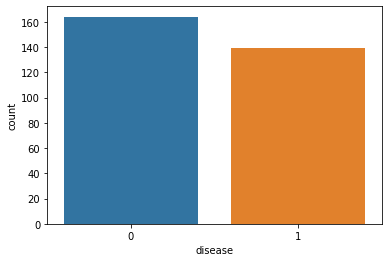

In [5]:
sns.countplot(x='disease', data=df);

In [6]:
from sklearn.model_selection import train_test_split
# Get the independent variables
X = df.iloc[:,1:13]
# Get the dependent variables
y = df['disease']

# split the dataset into 70% as training and 30% as testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.svm import SVC
svm = SVC(C=1, kernel='linear', random_state=1, probability = True)
svm.fit(X=X_train, y=y_train)

SVC(C=1, kernel='linear', probability=True, random_state=1)

In [8]:
svm_rbf = SVC(C=1000, degree = 2, kernel='poly', random_state=42, probability = True)
svm_rbf.fit(X=X_train, y=y_train)

SVC(C=1000, degree=2, kernel='poly', probability=True, random_state=42)

In [9]:
y_pred = svm.predict(X=X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1])

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# confusion matrix
print ( confusion_matrix(y_true=y_test, y_pred=y_pred) )
print ( accuracy_score(y_true=y_test, y_pred=y_pred) )
print ( f1_score(y_true=y_test, y_pred=y_pred) )

[[41  7]
 [ 5 38]]
0.8681318681318682
0.8636363636363636


In [11]:
print ( confusion_matrix(y_true=y_test, y_pred=svm_rbf.predict(X_test)) )
print ( accuracy_score(y_true=y_test, y_pred=svm_rbf.predict(X_test)) )
print ( f1_score(y_true=y_test, y_pred=svm_rbf.predict(X_test)) )

[[43  5]
 [ 6 37]]
0.8791208791208791
0.8705882352941177


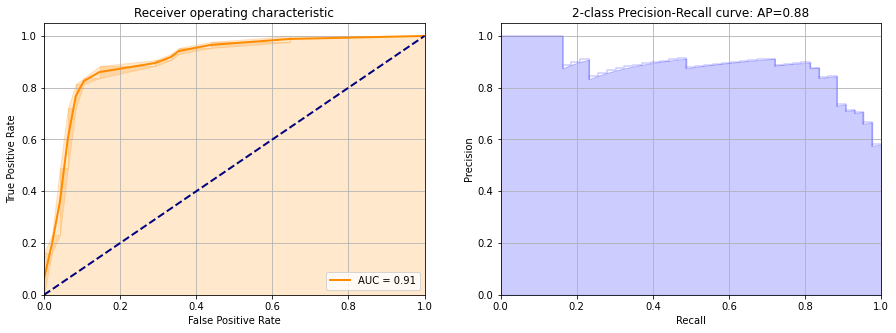

In [13]:
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_score=svm.predict_proba(X=X_test)[:, 1], y_true=y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm.predict_proba(X=X_test)[:, 1])

_, axs = plt.subplots(ncols = 2, figsize = (15, 5))
sns.lineplot(x=fpr, y=tpr, color='darkorange',
             lw=2, label='AUC = %0.2f' % roc_auc, ax=axs[0])
axs[0].fill_between(fpr, tpr, alpha=0.2, color='darkorange')
axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0].set_xlim([0.0, 1.0]); axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate'); axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('Receiver operating characteristic')
axs[0].legend(loc="lower right")
axs[0].grid()

precision, recall, _ = metrics.precision_recall_curve(y_test, svm.predict_proba(X=X_test)[:, 1])
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
average_precision = metrics.average_precision_score(y_test, svm.predict_proba(X=X_test)[:, 1])
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0]);plt.grid()
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision));

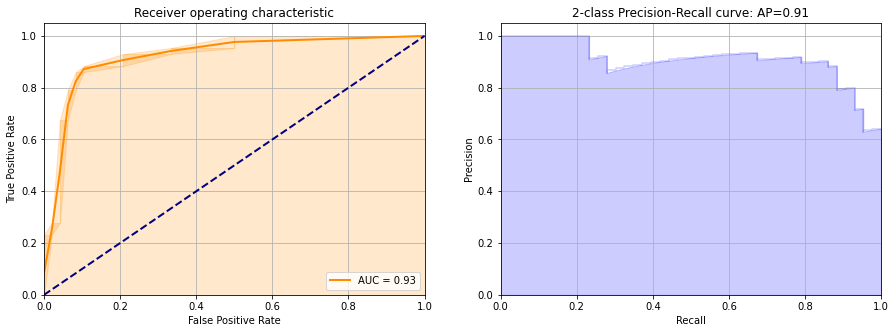

In [14]:
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_score=svm_rbf.predict_proba(X=X_test)[:, 1], y_true=y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_rbf.predict_proba(X=X_test)[:, 1])

_, axs = plt.subplots(ncols = 2, figsize = (15, 5))
sns.lineplot(x=fpr, y=tpr, color='darkorange',
             lw=2, label='AUC = %0.2f' % roc_auc, ax=axs[0])
axs[0].fill_between(fpr, tpr, alpha=0.2, color='darkorange')
axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0].set_xlim([0.0, 1.0]); axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate'); axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('Receiver operating characteristic')
axs[0].legend(loc="lower right")
axs[0].grid()

precision, recall, _ = metrics.precision_recall_curve(y_test, svm_rbf.predict_proba(X=X_test)[:, 1])
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
average_precision = metrics.average_precision_score(y_test, svm_rbf.predict_proba(X=X_test)[:, 1])
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0]);plt.grid()
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision));

In [15]:
# normalize data for better convergence and to prevent overflow
sclr = MinMaxScaler().fit(X_train.values)
X_train_sc = np.hstack([np.ones(X_train.shape[0])[...,None], sclr.transform(X_train)])
X_test_sc = np.hstack([np.ones(X_test.shape[0])[...,None], sclr.transform(X_test)])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [16]:
svm_rbf = SVC(C=4, gamma = .08, kernel='rbf', random_state=42, probability = True)
svm_rbf.fit(X=X_train_sc[:, 1:], y=y_train)

SVC(C=4, gamma=0.08, probability=True, random_state=42)

In [17]:
print ( confusion_matrix(y_true=y_test, y_pred=svm_rbf.predict(X_test_sc[:,1:])) )
print ( accuracy_score(y_true=y_test, y_pred=svm_rbf.predict(X_test_sc[:,1:])) )
print ( f1_score(y_true=y_test, y_pred=svm_rbf.predict(X_test_sc[:,1:])) )

[[43  5]
 [ 5 38]]
0.8901098901098901
0.8837209302325582


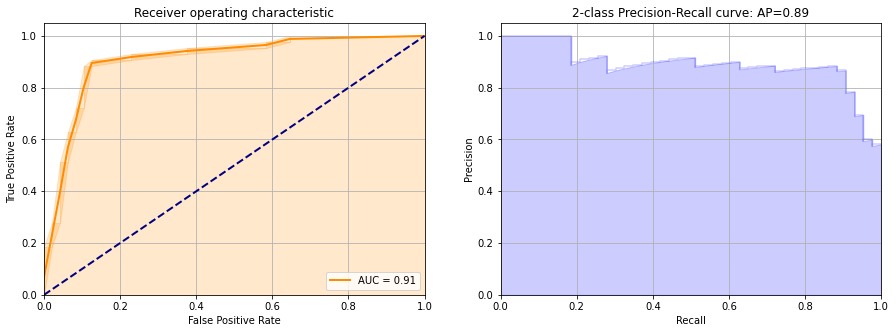

In [18]:
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_score=svm_rbf.predict_proba(X=X_test_sc[:,1:])[:, 1], y_true=y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_rbf.predict_proba(X=X_test_sc[:,1:])[:, 1])

_, axs = plt.subplots(ncols = 2, figsize = (15, 5))
sns.lineplot(x=fpr, y=tpr, color='darkorange',
             lw=2, label='AUC = %0.2f' % roc_auc, ax=axs[0])
axs[0].fill_between(fpr, tpr, alpha=0.2, color='darkorange')
axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0].set_xlim([0.0, 1.0]); axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate'); axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('Receiver operating characteristic')
axs[0].legend(loc="lower right")
axs[0].grid()

precision, recall, _ = metrics.precision_recall_curve(y_test, svm_rbf.predict_proba(X=X_test_sc[:,1:])[:, 1])
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
average_precision = metrics.average_precision_score(y_test, svm_rbf.predict_proba(X=X_test_sc[:,1:])[:, 1])
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0]);plt.grid()
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision));

In [20]:
## https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2

def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * np.dot(X, W)
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)
    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])
    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (reg_strength * Y_batch[ind] * X_batch[ind])
        dw += di
    dw = dw/len(Y_batch)  # average
    return dw

def sgd(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)
        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is:{} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights


In [21]:
regularization_strength = 10000
reg_strength = 10000
learning_rate = 0.000001

data = pd.read_csv('https://raw.githubusercontent.com/qandeelabbassi/python-svm-sgd/master/data/data.csv')
# drop last column (extra column added by pd)
# and unnecessary first column (id)
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)
diag_map = {'M': 1.0, 'B': -1.0}
data['diagnosis'] = data['diagnosis'].map(diag_map)
Y = data.loc[:, 'diagnosis']#.values
X = data.iloc[:, 1:]#.values
X.insert(loc=len(X.columns), column='intercept', value=1)
# normalize data for better convergence and to prevent overflow
sc = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

W = sgd(X_train_sc, y_train.to_numpy())


Epoch is:1 and Cost is: 7497.54276976363
Epoch is:2 and Cost is: 5740.670927259816
Epoch is:4 and Cost is: 4550.845135365757
Epoch is:8 and Cost is: 3687.8965889822116
Epoch is:16 and Cost is: 3108.0812043217747
Epoch is:32 and Cost is: 2528.13198550668
Epoch is:64 and Cost is: 2010.7068656197948
Epoch is:128 and Cost is: 1667.5870722900129
Epoch is:256 and Cost is: 1458.9528929246248
Epoch is:512 and Cost is: 1353.9235131864787
Epoch is:1024 and Cost is: 1309.9925772836275
Epoch is:2048 and Cost is: 1268.1058296460883
Epoch is:4096 and Cost is: 1265.495243323139


In [22]:
y_train_predicted = np.array([])
for i in range(X_train.shape[0]):
    yp = np.sign(np.dot(X_train_sc[i], W))
    y_train_predicted = np.append(y_train_predicted, yp)

y_test_predicted = np.array([])
for i in range(X_test.shape[0]):
    yp = np.sign(np.dot(X_test_sc[i], W))
    y_test_predicted = np.append(y_test_predicted, yp)

print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))
print("recall on test dataset: {}".format(recall_score(y_test, y_test_predicted)))
print("precision on test dataset: {}".format(recall_score(y_test, y_test_predicted)))


accuracy on test dataset: 0.956140350877193
recall on test dataset: 0.9069767441860465
precision on test dataset: 0.9069767441860465


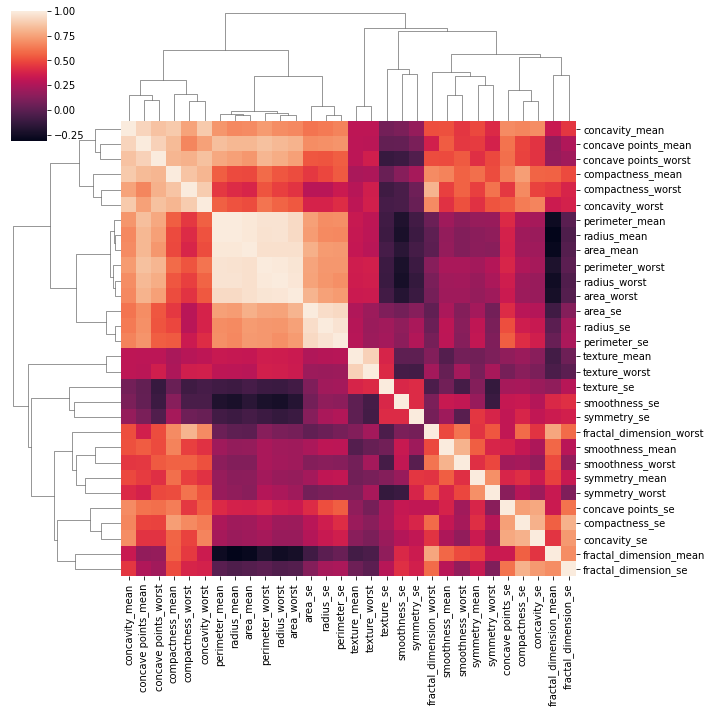

In [ ]:
sns.clustermap( X.iloc[:,:-1].corr() );

In [23]:
corr_threshold = 0.9
corr = X_train.corr()
drop_columns = np.full(corr.shape[0], False, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i + 1, corr.shape[0]):
        if corr.iloc[i, j] >= corr_threshold:
            drop_columns[j] = True
columns_dropped = X.columns[drop_columns]

#sc = MinMaxScaler()
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)


X_train_sc = X_train_sc[:, drop_columns ]
X_test_sc = X_test_sc[:, drop_columns ]

In [24]:
W = sgd(X_train_sc, y_train.to_numpy())
y_train_predicted = np.array([])
for i in range(X_train.shape[0]):
    yp = np.sign(np.dot(X_train_sc[i], W))
    y_train_predicted = np.append(y_train_predicted, yp)

y_test_predicted = np.array([])
for i in range(X_test.shape[0]):
    yp = np.sign(np.dot(X_test_sc[i], W))
    y_test_predicted = np.append(y_test_predicted, yp)

print("accuracy on test dataset: {}".format(accuracy_score(y_test.values, y_test_predicted)))
print("recall on test dataset: {}".format(recall_score(y_test.values, y_test_predicted)))
print("precision on test dataset: {}".format(recall_score(y_test.values, y_test_predicted)))


Epoch is:1 and Cost is: 8978.685549818763
Epoch is:2 and Cost is: 8743.594705991618
Epoch is:4 and Cost is: 8374.097385424286
Epoch is:8 and Cost is: 7623.18555193229
Epoch is:16 and Cost is: 6765.843559752204
Epoch is:32 and Cost is: 6103.11017515028
Epoch is:64 and Cost is: 5453.775690123848
Epoch is:128 and Cost is: 4572.030938562912
Epoch is:256 and Cost is: 3655.9589273781685
Epoch is:512 and Cost is: 3122.361743200556
Epoch is:1024 and Cost is: 2903.7987575724974
Epoch is:2048 and Cost is: 2845.0587205931083
Epoch is:4096 and Cost is: 2836.014812919504
accuracy on test dataset: 0.956140350877193
recall on test dataset: 0.9302325581395349
precision on test dataset: 0.9302325581395349


Преимущества SVM:
* Хорошо работает с пространством признаков большого размера 
* Хорошо работает с данными небольшого объема
* Вместо многоэкстремальной задачи решается задача квадратичного программирования, имеющая единственное решение. Методы оптимизации в этом случае существенно более эффективны.
* Принцип оптимальной разделяющей гиперплоскости приводит к максимизации
ширины разделяющей полосы между классами, следовательно, к более уверенной классификации. 

Недостатки SVM:
* Метод опорных векторов неустойчив к шуму в исходных данных. Если обучающая выборка содержит выбросы, они будут существенным образом учтены
при построении разделяющей гиперплоскости. Этого недостатка лишён метод
релевантных векторов (relevance vector machine, RVM), см. 1.4.2.
* До сих пор не разработаны общие методы построения спрямляющих пространств или ядер, наиболее подходящих для конкретной задачи. Построение адекватного ядра является искусством и, как правило, опирается на априорные знания о предметной области. На практике «вполне разумные» функции $K(x,x′)$, выведенные из содержательных соображений, далеко не всегда оказываются положительно определёнными.
* В общем случае, когда линейная разделимость не гарантируется, приходится
подбирать управляющий параметр алгоритма C.
* Долгое время обучения (особенно для больших наборов данных)

* http://machinelearning.ru/wiki/images/6/68/Voron-ML-Lin.pdf
* https://habr.com/ru/company/ods/blog/484148/

Основы алгоритмов машинного обучения https://github.com/eriklindernoren/ML-From-Scratch &mdash; реализация "с нуля"

### Kernel-PCA


In [25]:
## https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
X, y = load_digits(return_X_y=True)
transformer = KernelPCA(n_components=2, kernel='poly', degree = 3 )
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(1797, 2)

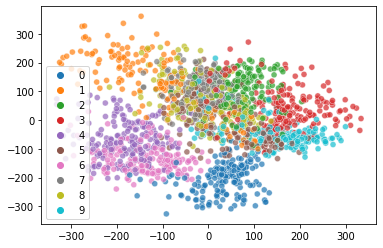

In [26]:
sns.scatterplot( x = X_transformed[:,0],
                 y = X_transformed[:,1],
                 hue = y.astype(str), alpha = .7);

In [27]:
## from https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [28]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

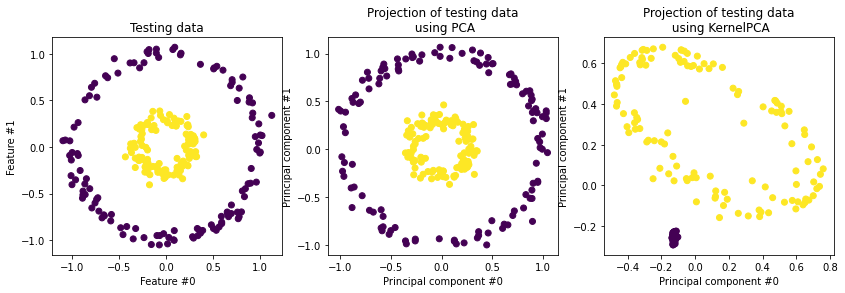

In [ ]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

In [29]:
## from https://scikit-learn.org/stable/auto_examples/applications/plot_digits_denoising.html
from sklearn.datasets import fetch_openml

X, y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True)
X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, train_size=1_000, test_size=100
)

rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

pca = PCA(n_components=32)
kernel_pca = KernelPCA(
    n_components=400, kernel="rbf", gamma=1e-3, fit_inverse_transform=True, alpha=5e-3
)

pca.fit(X_train_noisy)
_ = kernel_pca.fit(X_train_noisy)

X_reconstructed_kernel_pca = kernel_pca.inverse_transform(
    kernel_pca.transform(X_test_noisy)
)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisy))


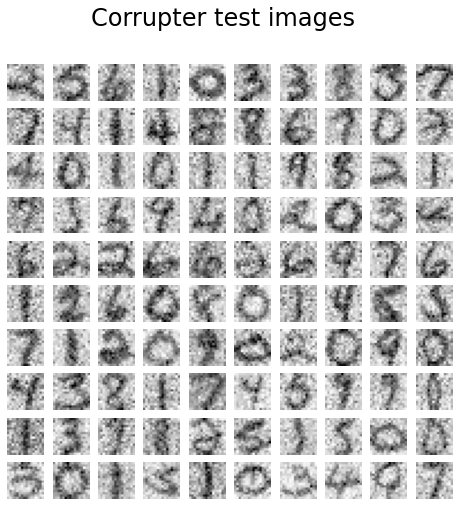

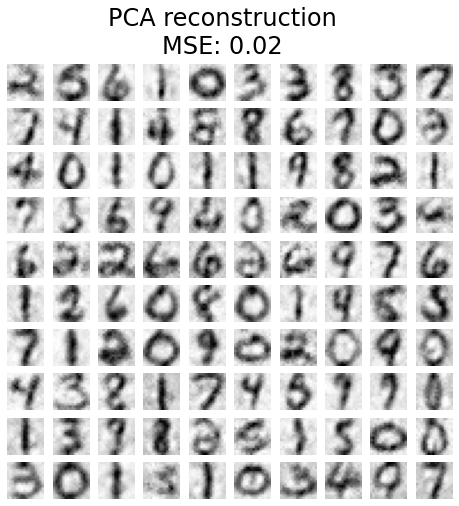

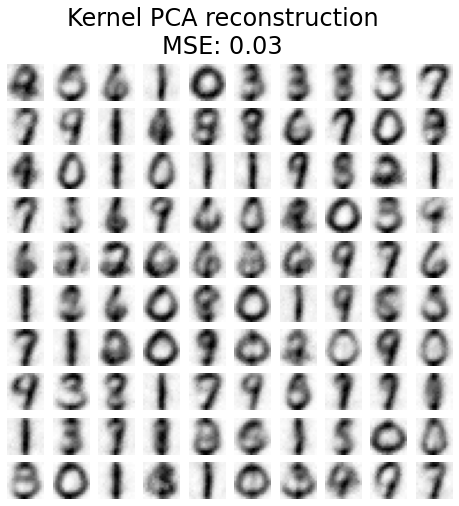

In [ ]:
plot_digits(X_test_noisy, "Corrupter test images")
plot_digits(
    X_reconstructed_pca,
    f"PCA reconstruction\nMSE: {np.mean((X_test - X_reconstructed_pca) ** 2):.2f}",
)
plot_digits(
    X_reconstructed_kernel_pca,
    "Kernel PCA reconstruction\n"
    f"MSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}",
)

* https://nanohub.org/resources/32712/download/2020.01.31-ECE595ML-L07.2.pdf
* https://nirpyresearch.com/pca-kernel-pca-explained/
* https://www.cs.mcgill.ca/~dprecup/courses/ML/Lectures/ml-lecture13.pdf

## Decision Tree

$k_{1}, k_{2}$

$p(i) = P(x_{i} \in k_{i}) = \dfrac{n_{i}}{n_{1} + n_{2}},  i \in \{1, 2\}$

$G = 1 - \Sigma_{i=1}^{2}p(i)^{2}$

$GINI gain = \Delta Gini = Gini_{parent} - (Gini_{left} \dfrac{n_{left}}{n_{right} + n_{left}} + Gini_{right} \dfrac{n_{right}}{n_{right} + n_{left}} )$



$Entropy = \sum^c_{i=1}-p_ilog_2p_i$
  
$Information\ gain = 1 - Entropy$

In [30]:
df = sns.load_dataset('iris')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
84,5.4,3.0,4.5,1.5,versicolor
32,5.2,4.1,1.5,0.1,setosa
127,6.1,3.0,4.9,1.8,virginica
17,5.1,3.5,1.4,0.3,setosa
48,5.3,3.7,1.5,0.2,setosa


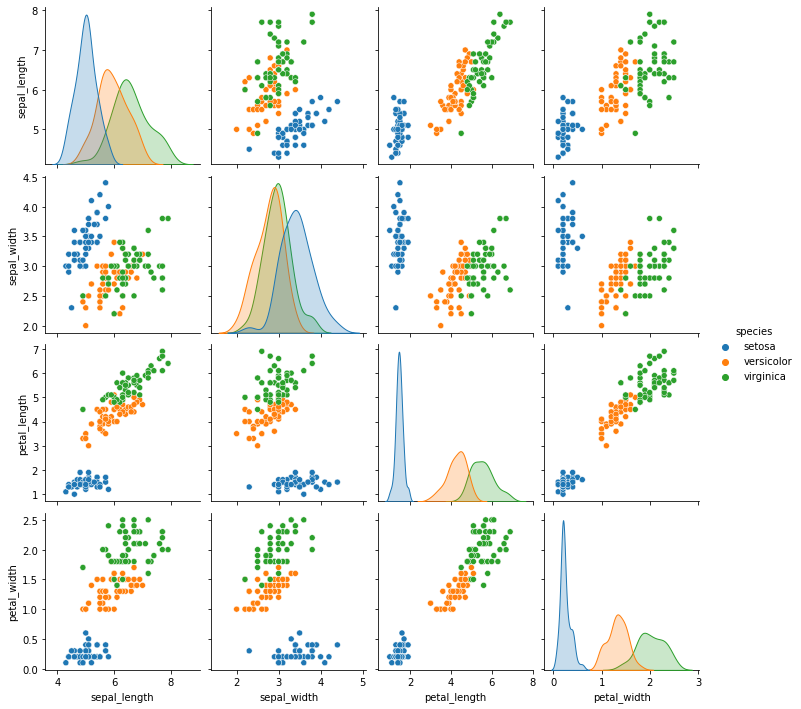

In [31]:
sns.pairplot(data=df, hue = 'species')

In [32]:
Y = df['species']
X = df.copy()
X = X.drop('species', axis =1)

In [33]:
y = Y.factorize()[0].astype(int)

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

In [36]:
def gini_impurity(y):
  '''
  Given a Pandas Series, it calculates the Gini Impurity. 
  y: variable with which calculate Gini Impurity.
  '''
  if isinstance(y, pd.Series):
    p = y.value_counts()/y.shape[0]
    gini = 1-np.sum(p**2)
    return(gini)

  else:
    raise('Object must be a Pandas Series.')

gini_impurity(Y) , gini_impurity( Y[X.petal_length < 3]), gini_impurity( Y[X.petal_length < 4])

(0.6666666666666667, 0.0, 0.2956194571351787)

In [41]:
1 - ((Y.value_counts()/150)**2).sum()

0.6666666666666667

In [45]:
#Y[X.petal_length < 3]
Y[X.petal_length < 4].value_counts().div(61)

setosa        0.819672
versicolor    0.180328
Name: species, dtype: float64

In [46]:
def entropy(y):
  '''
  Given a Pandas Series, it calculates the entropy. 
  y: variable with which calculate entropy.
  '''
  if isinstance(y, pd.Series):
    a = y.value_counts()/y.shape[0]
    entropy = np.sum(-a*np.log2(a+1e-9))
    return(entropy)

  else:
    raise('Object must be a Pandas Series.')

entropy(Y) , entropy( Y[X.petal_length < 3]), entropy( Y[X.petal_length < 4])

(1.584962496393071, -1.4426951595367387e-09, 0.6807937724849306)

In [47]:
np.allclose(0, -1.4426951595367387e-09)

True

In [48]:
def variance(y):
  '''
  Function to help calculate the variance avoiding nan.
  y: variable to calculate variance to. It should be a Pandas Series.
  '''
  if(len(y) == 1):
    return 0
  else:
    return y.var()

def information_gain(y, mask, func=entropy):
  '''
  It returns the Information Gain of a variable given a loss function.
  y: target variable.
  mask: split choice.
  func: function to be used to calculate Information Gain in case os classification.
  '''
  
  a = sum(mask)
  b = mask.shape[0] - a
  
  if(a == 0 or b ==0): 
    ig = 0
  
  else:
    if y.dtypes != 'O':
      ig = variance(y) - (a/(a+b)* variance(y[mask])) - (b/(a+b)*variance(y[-mask]))
    else:
      ig = func(y)-a/(a+b)*func(y[mask])-b/(a+b)*func(y[-mask])
  
  return ig

information_gain(Y, X.petal_length < 3 )

0.9182958321308963

In [50]:
import itertools

def categorical_options(a):
  '''
  Creates all possible combinations from a Pandas Series.
  a: Pandas Series from where to get all possible combinations. 
  '''
  a = a.unique()

  opciones = []
  for L in range(0, len(a)+1):
      for subset in itertools.combinations(a, L):
          subset = list(subset)
          opciones.append(subset)

  return opciones[1:-1]

def max_information_gain_split(x, y, func=gini_impurity):
  '''
  Given a predictor & target variable, returns the best split, the error and the type of variable based on a selected cost function.
  x: predictor variable as Pandas Series.
  y: target variable as Pandas Series.
  func: function to be used to calculate the best split.
  '''

  split_value = []
  ig = [] 

  numeric_variable = True if x.dtypes != 'O' else False

  # Create options according to variable type
  if numeric_variable:
    options = x.sort_values().unique()[1:]
  else: 
    options = categorical_options(x)

  # Calculate ig for all values
  for val in options:
    mask =   x < val if numeric_variable else x.isin(val)
    val_ig = information_gain(y, mask, func)
    # Append results
    ig.append(val_ig)
    split_value.append(val)

  # Check if there are more than 1 results if not, return False
  if len(ig) == 0:
    return(None,None,None, False)

  else:
  # Get results with highest IG
    best_ig = max(ig)
    best_ig_index = ig.index(best_ig)
    best_split = split_value[best_ig_index]
    return(best_ig,best_split,numeric_variable, True)


weight_ig, weight_slpit, _, _ = max_information_gain_split( X.petal_length , Y )  


print(
  "The best split for petal_length is when the variable is less than ",
  weight_slpit,"\nInformation Gain for that split is:", weight_ig
)

The best split for petal_length is when the variable is less than  3.0 
Information Gain for that split is: 0.3333333333333334


In [51]:
X.apply(lambda xx, y: max_information_gain_split(xx, y, func = gini_impurity), y = Y)

,sepal_length,sepal_width,petal_length,petal_width
0,0.22776,0.126923,0.333333,0.333333
1,5.5,3.4,3.0,1.0
2,True,True,True,True
3,True,True,True,True


In [52]:
X.apply(lambda xx, y: max_information_gain_split(xx, y, func = entropy), y = Y)

,sepal_length,sepal_width,petal_length,petal_width
0,0.557233,0.283126,0.918296,0.918296
1,5.6,3.4,3.0,1.0
2,True,True,True,True
3,True,True,True,True


In [53]:
def get_best_split(y, data):
  '''
  Given a data, select the best split and return the variable, the value, the variable type and the information gain.
  y: name of the target variable
  data: dataframe where to find the best split.
  '''
  masks = data.drop(y, axis= 1).apply(max_information_gain_split, y = data[y])
  if sum(masks.loc[3,:]) == 0:
    return(None, None, None, None)

  else:
    # Get only masks that can be splitted
    masks = masks.loc[:,masks.loc[3,:]]

    # Get the results for split with highest IG
    split_variable = max(masks)
    #split_valid = masks[split_variable][]
    split_value = masks[split_variable][1] 
    split_ig = masks[split_variable][0]
    split_numeric = masks[split_variable][2]

    return(split_variable, split_value, split_ig, split_numeric)


def make_split(variable, value, data, is_numeric):
  '''
  Given a data and a split conditions, do the split.
  variable: variable with which make the split.
  value: value of the variable to make the split.
  data: data to be splitted.
  is_numeric: boolean considering if the variable to be splitted is numeric or not.
  '''
  if is_numeric:
    data_1 = data[data[variable] < value]
    data_2 = data[(data[variable] < value) == False]

  else:
    data_1 = data[data[variable].isin(value)]
    data_2 = data[(data[variable].isin(value)) == False]

  return(data_1,data_2)

def make_prediction(data, target_factor):
  '''
  Given the target variable, make a prediction.
  data: pandas series for target variable
  target_factor: boolean considering if the variable is a factor or not
  '''

  # Make predictions
  if target_factor:
    pred = data.value_counts().idxmax()
  else:
    pred = data.mean()

  return pred

In [54]:
def train_tree(data, y, target_factor, max_depth = None, min_samples_split = None, min_information_gain = 1e-20, counter=0, max_categories = 20):
  '''
  Trains a Decission Tree
  data: Data to be used to train the Decission Tree
  y: target variable column name
  target_factor: boolean to consider if target variable is factor or numeric.
  max_depth: maximum depth to stop splitting.
  min_samples_split: minimum number of observations to make a split.
  min_information_gain: minimum ig gain to consider a split to be valid.
  max_categories: maximum number of different values accepted for categorical values. High number of values will slow down learning process. R
  '''

  # Check that max_categories is fulfilled
  if counter==0:
    types = data.dtypes
    check_columns = types[types == "object"].index
    for column in check_columns:
      var_length = len(data[column].value_counts()) 
      if var_length > max_categories:
        raise ValueError('The variable ' + column + ' has '+ str(var_length) + ' unique values, which is more than the accepted ones: ' +  str(max_categories))

  # Check for depth conditions
  if max_depth == None:
    depth_cond = True

  else:
    if counter < max_depth:
      depth_cond = True

    else:
      depth_cond = False

  # Check for sample conditions
  if min_samples_split == None:
    sample_cond = True

  else:
    if data.shape[0] > min_samples_split:
      sample_cond = True

    else:
      sample_cond = False

  # Check for ig condition
  if depth_cond & sample_cond:

    var,val,ig,var_type = get_best_split(y, data)

    # If ig condition is fulfilled, make split 
    if ig is not None and ig >= min_information_gain:

      counter += 1

      left,right = make_split(var, val, data,var_type)

      # Instantiate sub-tree
      split_type = "<=" if var_type else "in"
      question =   "{} {}  {}".format(var,split_type,val)
      # question = "\n" + counter*" " + "|->" + var + " " + split_type + " " + str(val) 
      subtree = {question: []}


      # Find answers (recursion)
      yes_answer = train_tree(left,y, target_factor, max_depth,min_samples_split,min_information_gain, counter)

      no_answer = train_tree(right,y, target_factor, max_depth,min_samples_split,min_information_gain, counter)

      if yes_answer == no_answer:
        subtree = yes_answer

      else:
        subtree[question].append(yes_answer)
        subtree[question].append(no_answer)

    # If it doesn't match IG condition, make prediction
    else:
      pred = make_prediction(data[y],target_factor)
      return pred

   # Drop dataset if doesn't match depth or sample conditions
  else:
    pred = make_prediction(data[y],target_factor)
    return pred

  return subtree


In [55]:
X_train, X_test, y_train, y_test = train_test_split(df , y, test_size = 0.2, random_state = 42)

In [56]:
X_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
65,6.7,3.1,4.4,1.4,versicolor


In [57]:
max_depth = 40
min_samples_split = 4
min_information_gain  = 1e-3

decisions = train_tree(X_train.iloc[:,[1,2,3,4]],'species',True, max_depth,min_samples_split,min_information_gain)


decisions

{'sepal_width <=  3.4': [{'sepal_width <=  3.0': [{'sepal_width <=  2.5': ['versicolor',
      {'sepal_width <=  2.9': [{'sepal_width <=  2.8': [{'sepal_width <=  2.7': [{'sepal_width <=  2.6': [{'petal_width <=  1.7': ['versicolor',
                'virginica']},
              'versicolor']},
            {'petal_width <=  1.8': ['versicolor', 'virginica']}]},
          {'petal_width <=  1.8': ['versicolor', 'virginica']}]},
        {'petal_width <=  1.8': [{'petal_width <=  1.3': ['setosa',
            'versicolor']},
          'virginica']}]}]},
    {'sepal_width <=  3.3': [{'sepal_width <=  3.2': [{'sepal_width <=  3.1': [{'petal_width <=  1.8': [{'petal_width <=  1.2': ['setosa',
              'versicolor']},
            'virginica']},
          {'petal_width <=  1.8': [{'petal_width <=  1.4': ['setosa',
              'versicolor']},
            'virginica']}]},
        {'petal_width <=  1.4': ['setosa',
          {'petal_width <=  1.8': ['versicolor', 'virginica']}]}]},
      {'pe

In [ ]:
decisions.keys()

dict_keys(['sepal_width <=  3.3'])

In [ ]:
decisions['sepal_width <=  3.3']

[{'sepal_width <=  3.0': [{'sepal_width <=  2.5': ['versicolor',
     {'sepal_width <=  2.9': [{'sepal_width <=  2.8': ['versicolor',
         'virginica']},
       'versicolor']}]},
   {'sepal_width <=  3.2': [{'sepal_width <=  3.1': [{'sepal_length <=  5.4': ['setosa',
         'virginica']},
       'versicolor']},
     'setosa']}]},
 'setosa']

In [58]:
def classify(newdata, tree):
  question = list(tree.keys())[0] 

  if question.split()[1] == '<=':

    if newdata[question.split()[0]] <= float(question.split()[2]):
      answer = tree[question][0]
    else:
      answer = tree[question][1]

  else:

    if newdata[question.split()[0]] in (question.split()[2]):
      answer = tree[question][0]
    else:
      answer = tree[question][1]

  # If the answer is not a dictionary
  if not isinstance(answer, dict):
    return answer
  else:
    residual_tree = answer
    return classify(newdata, answer)

In [59]:
from sklearn import metrics as mt
mt.accuracy_score( np.array( [ classify(X_test.iloc[i], decisions) for i in range(X_test.shape[0]) ] ), X_test.species )

0.9

In [ ]:
mt.confusion_matrix( np.array( [ classify(X_test.iloc[i], decisions) for i in range(X_test.shape[0]) ] ), X_test.species )

array([[10,  0,  1],
       [ 0,  9,  2],
       [ 0,  0,  8]])

In [60]:
#for encoding
from sklearn.preprocessing import LabelEncoder
#for decision tree object
from sklearn.tree import DecisionTreeClassifier
#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
#for visualizing tree 
from sklearn.tree import plot_tree

In [61]:
df = sns.load_dataset('iris')
target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis =1)
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(df1 , target, test_size = 0.2, random_state = 42)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


In [62]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



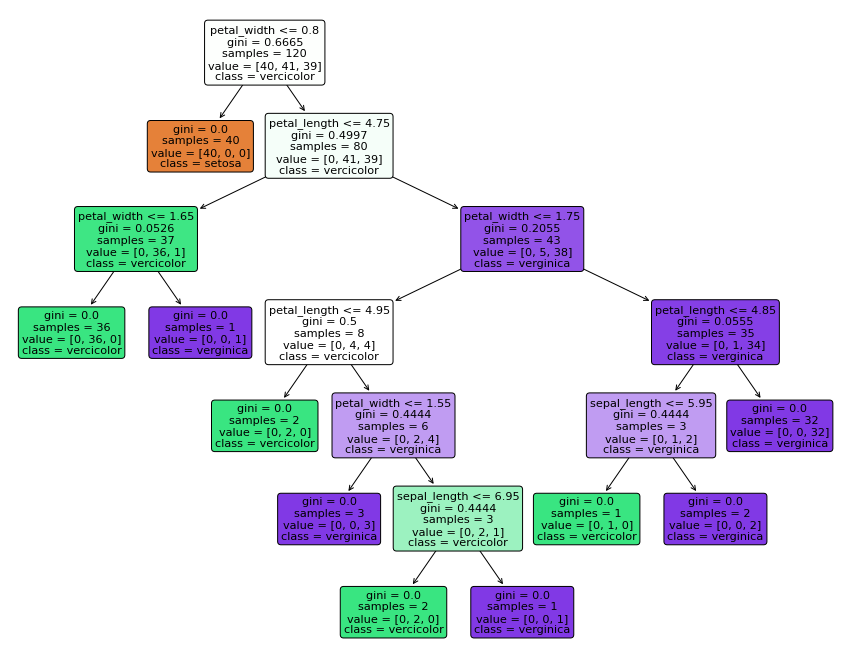

In [63]:
plt.figure(figsize = (15,12))
plot_tree(decision_tree=dtree, feature_names = df1.columns, 
          class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True);

* https://github.com/Eligijus112/decision-tree-python/blob/main/Decistion-tree.ipynb
* https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

* http://www.machinelearning.ru/wiki/images/5/5d/Kitov-ML-eng-05-Decision_trees.pdf
* http://www.machinelearning.ru/wiki/images/archive/9/97/20160225233454%21Voron-ML-Logic-slides.pdf
* https://towardsdatascience.com/decision-tree-algorithm-in-python-from-scratch-8c43f0e40173
* https://github.com/Eligijus112/decision-tree-python/blob/main/Decistion-tree.ipynb
* https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/
* https://github.com/sanketkangle/medium-article-codes/blob/master/Decision%20Tree.ipynb

### Дополнительные материалы и полезные ссылки  

* https://mlcourse.ai/  
* https://scikit-learn.org
* https://scikit-learn.org/stable/tutorial/index.html
* http://www.machinelearning.ru/
* http://www.machinelearning.ru/wiki/index.php?title=Машинное_обучение_%28курс_лекций%2C_К.В.Воронцов%29
* https://github.com/esokolov/ml-course-hse/tree/master/2016-fall/lecture-notes
* https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture12-unsupervised.pdf
* https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture13-features.pdf
* http://kaggle.com 
* http://kdnuggets.com
* https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

#### Полезные ссылки для тех, кто работает с большими наборами данных:
**Dask**: http://docs.dask.org/en/latest/  
**Numba**: http://numba.pydata.org/  
https://towardsdatascience.com/how-i-learned-to-love-parallelized-applies-with-python-pandas-dask-and-numba-f06b0b367138